In [84]:
#import required libraried

import pandas as pd
import numpy as np
from sklearn import linear_model
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
import warnings

# <span style="color:#000; font-size:1.2em;">Import Train and Test Datsets and print their first few values</span>

In [4]:
train_data_default = pd.read_csv('train.csv')       # Import Train DataSet
test_data_default = pd.read_csv('test.csv')       # Import Test DataSet

print('\033[4mDefault Train Data HEAD : \033[0m')       
print(train_data_default.head())       # Print HEAD of imported Train DataSet

print('\n\033[4mDefault Test Data HEAD : \033[0m')
print(test_data_default.head())       # Print HEAD of imported Test DataSet

Default Train Data HEAD : 
      x          y
0  24.0  21.549452
1  50.0  47.464463
2  15.0  17.218656
3  38.0  36.586398
4  87.0  87.288984

Default Test Data HEAD : 
    x          y
0  77  79.775152
1  21  23.177279
2  22  25.609262
3  20  17.857388
4  36  41.849864


# <span style="color:#000; font-size:1.2em;">Describe summaries of the Default Train and Test Datasets</span>

In [6]:
print('\033[4mTrain Data Default Describe : \033[0m')
print(train_data_default.describe())       # Print Summary of Default Train DataSet

print('\n\033[4mTest Data Default Describe : \033[0m')
print(test_data_default.describe())       # Print Summary of Default Test DataSet

Train Data Default Describe : 
                 x           y
count   700.000000  699.000000
mean     54.985939   49.939869
std     134.681703   29.109217
min       0.000000   -3.839981
25%      25.000000   24.929968
50%      49.000000   48.973020
75%      75.000000   74.929911
max    3530.157369  108.871618

Test Data Default Describe : 
                x           y
count  300.000000  300.000000
mean    50.936667   51.205051
std     28.504286   29.071481
min      0.000000   -3.467884
25%     27.000000   25.676502
50%     53.000000   52.170557
75%     73.000000   74.303007
max    100.000000  105.591837


# <span style="color:#339999; font-size:0.75em;">Findings through data summary</span>

<p style="color:#339999; font-size:1.1em;">
    We can see that there is an empty value in train dataset in the 'y' column.
    Also the IQR is approximately 50 and there seems to be an outlier value available in the dataset that can affect further
    computations
</p>

# <span style="color:#000; font-size:1.2em;">Plot The Default Data using Various plots</span>

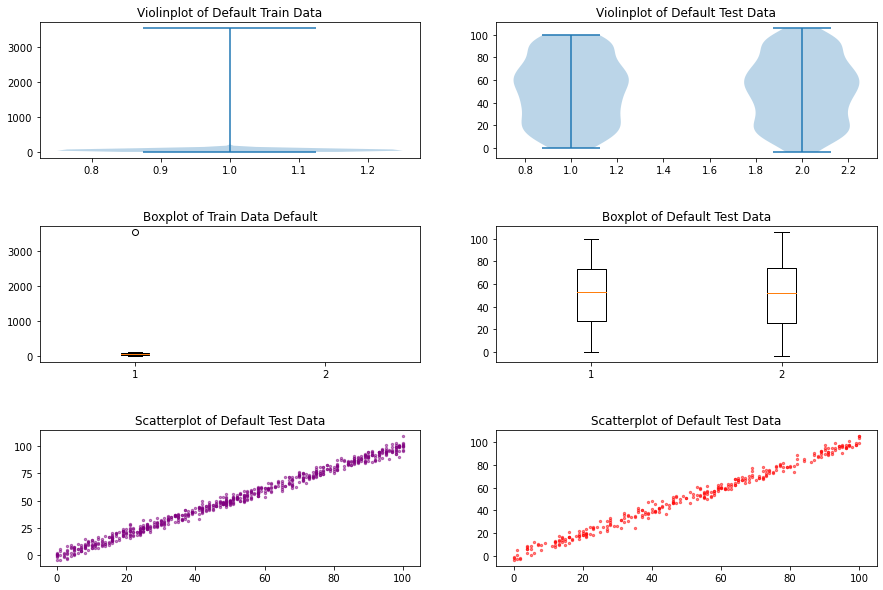

In [16]:
warnings.filterwarnings('ignore')

plt.figure
fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(15, 10))

axs[0,0].violinplot(train_data_default)       # ViolinPlot of Default train dataset
axs[0,0].set_title('Violinplot of Default Train Data')

axs[0,1].violinplot(test_data_default)       # ViolinPlot of Default test dataset
axs[0,1].set_title('Violinplot of Default Test Data')

axs[1,0].boxplot(train_data_default)       # BoxPlot of Default Train Dataset
axs[1,0].set_title('Boxplot of Train Data Default')

axs[1,1].boxplot(test_data_default)       # BoxPlot of Default Test Dataset
axs[1,1].set_title('Boxplot of Default Test Data')

axs[2,0].scatter(train_data_default['x'], train_data_default['y'], c='Purple', marker=None, s=5.5, edgecolors='Purple',
                 alpha=0.5)       # ScatterPlot of Default Train Dataset
axs[2,0].set_title('Scatterplot of Default Test Data')

axs[2,1].scatter(test_data_default['x'], test_data_default['y'], c='Red', marker=None, s=5.5, edgecolors='Red',
                 alpha=0.5)       # ScatterPlot of Default Test Dataset
axs[2,1].set_title('Scatterplot of Default Test Data')

plt.subplots_adjust(hspace=0.5)
plt.show()

# <span style="color:#339999; font-size:0.75em;">Findings through Data Plots</span>

<p style="color:#339999; font-size:1.1em;">
    Through ViolinPlots and BoxPlots we see that there is an outlier in the 'x' column of train data, which does not have the corresponding 'y' value. This is a massive outlier that can affect out regression model thus needs to be removed.
</p>

# <span style="color:#000; font-size:1.2em;">Finding Status of Missing Values in Datasets</span>


In [18]:
def missing_status(dataframe):       # Function to check the status of missing values in passed Dataframe
    boolean = pd.Series(dataframe.isna().any()).values
    count = pd.Series(dataframe.isna().sum()).values
    d = {'Missing Status' : boolean, 'Missing Count' : count }
    return pd.DataFrame(d,index=['x','y'])

In [20]:
print('\033[4mDefault Train Data Missing Values Status : \033[0m\n')
print(missing_status(train_data_default).to_string())       # Missing value status in Default Train Dataset
print('\n\033[4mDefault Test Data Missing Values Status : \033[0m\n')
print(missing_status(test_data_default).to_string())       # Missing value status in Default Test Dataset

Default Train Data Missing Values Status : 

   Missing Status  Missing Count
x           False              0
y            True              1

Default Test Data Missing Values Status : 

   Missing Status  Missing Count
x           False              0
y           False              0


# <span style="color:#000; font-size:1.2em;">Drop missing values from Default Train and Test Datasets and put the cleaned datasets in variables</span>


In [21]:
train_data = train_data_default.dropna()
test_data = test_data_default.dropna()

In [22]:
print('\033[4mTrain Data Missing Values Status : \033[0m\n')
print(missing_status(train_data).to_string())
print('\n\033[4mTest Data Missing Values Status : \033[0m\n')
print(missing_status(test_data).to_string())

Train Data Missing Values Status : 

   Missing Status  Missing Count
x           False              0
y           False              0

Test Data Missing Values Status : 

   Missing Status  Missing Count
x           False              0
y           False              0


# <span style="color:#339999; font-size:0.75em;">Findings : </span>
<p style="color:#339999; font-size:1.1em;">
    After removing NA values we can see that there are no missing values in both test and train datasets and the number of observations in both datasets is also equal, which is proved by the table summary below
</p>

# <span style="color:#000; font-size:1.2em;">Describe summaries of the Train and Test Datasets</span>

In [145]:
print('\033[4mTrain Data Describe : \033[0m')
print(train_data.describe())
print('\n\033[4mTest Data Describe : \033[0m')
print(test_data.describe())

Train Data Describe : 
                x           y
count  699.000000  699.000000
mean    50.014306   49.939869
std     28.954560   29.109217
min      0.000000   -3.839981
25%     25.000000   24.929968
50%     49.000000   48.973020
75%     75.000000   74.929911
max    100.000000  108.871618

Test Data Describe : 
                x           y
count  300.000000  300.000000
mean    50.936667   51.205051
std     28.504286   29.071481
min      0.000000   -3.467884
25%     27.000000   25.676502
50%     53.000000   52.170557
75%     73.000000   74.303007
max    100.000000  105.591837


# <span style="color:#000; font-size:1.2em;">Plot The Data using Various plots</span>

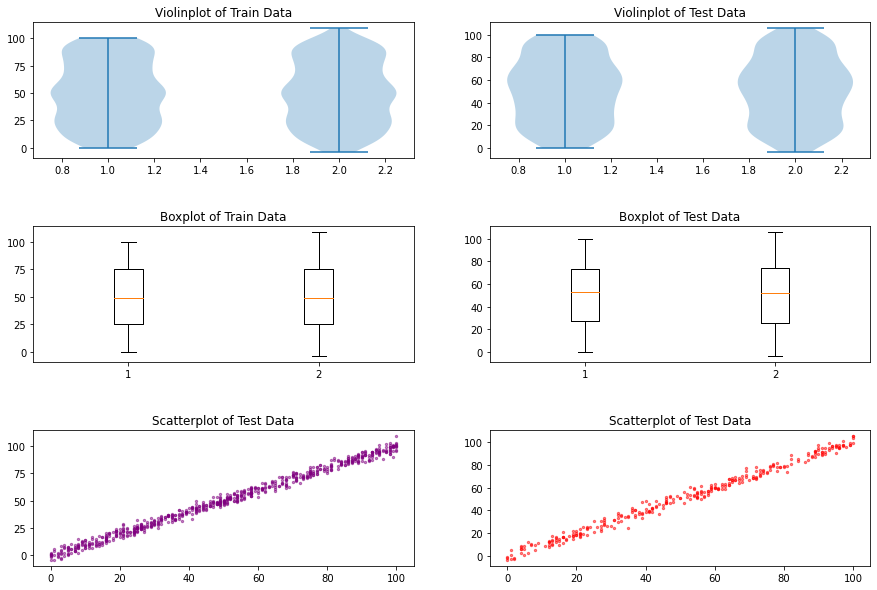

In [24]:
plt.figure
fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(15, 10))

axs[0,0].violinplot(train_data)       # ViolinPlot of Train Data
axs[0,0].set_title('Violinplot of Train Data')

axs[0,1].violinplot(test_data)       # ViolinPlot of Test Data
axs[0,1].set_title('Violinplot of Test Data')

axs[1,0].boxplot(train_data)       # BoxPlot of Train Data
axs[1,0].set_title('Boxplot of Train Data')

axs[1,1].boxplot(test_data)       # BoxPlot of Test Data
axs[1,1].set_title('Boxplot of Test Data')

axs[2,0].scatter(train_data['x'], train_data['y'], c='Purple', marker=None, s=5.5, edgecolors='Purple',
                 alpha=0.5)       # ScatterPlot of Train Data
axs[2,0].set_title('Scatterplot of Test Data')

axs[2,1].scatter(test_data['x'], test_data['y'], c='Red', marker=None, s=5.5, edgecolors='Red',
                 alpha=0.5)       # ScatterPlot of Test Data
axs[2,1].set_title('Scatterplot of Test Data')

plt.subplots_adjust(hspace=0.5)
plt.show()

# <span style="color:#339999; font-size:0.75em;">Findings through Data Plots</span>

<p style="color:#339999; font-size:1.1em;">
    Through ViolinPlots and BoxPlots we see that the missing values and outliers are removed and the data is evenly distributed
</p>

# <span style="color:#000; font-size:1.5em;">Creating Models</span>

# <span style="color:#000; font-size:1.2em;">Linear Regression</span>

In [42]:
x_train = train_data['x'].values.reshape(-1,1)     # The feature column of Train Dataset
y_train = train_data['y']       # The output column of Train Dataset
x_test = test_data['x'].values.reshape(-1,1)       # The feature column of Test Dataset
y_test = test_data['y']       # The output column of Test Dataset

In [40]:
linear_Regression_Model = linear_model.LinearRegression()       # Linear Regression with Default Parameters
linear_Regression_Model.fit(x_train,y_train)       # Fit the model to the Train Dataset

LinearRegression()

# <span style="color:#000; font-size:0.75em;">Evaluation Metrics of Fitted Linear Regression Model</span>

In [49]:
Linear_Regression_fit_evaulation = {'Coefficient':linear_Regression_Model.coef_,
                                    'Intercept':linear_Regression_Model.intercept_,
                                    'No. of Features':linear_Regression_Model.n_features_in_,
                                    'R_squared score (Train)':linear_Regression_Model.score(x_train,y_train),
                                    'R_squared score (Test)':linear_Regression_Model.score(x_test,y_test)}
Linear_Regression_fit_evaulation = pd.DataFrame(Linear_Regression_fit_evaulation,index=['Linear Regression Model Fit Metrics'])
Linear_Regression_fit_evaulation

,Coefficient,Intercept,No. of Features,R_squared score (Train),R_squared score (Test)
Linear Regression Model Fit Metrics,1.000656,-0.107265,1,0.990702,0.988801


# <span style="color:#339999; font-size:0.75em;">Findings:</span>

<p style="color:#339999; font-size:1.1em;">
    The R-squared score is 0.990702 on the train set and 0.988801 on the test set which shows that the model fits very well on the data. 
</p>

# <span style="color:#000; font-size:0.75em;">Evaluation Metrics of Prediction using Linear Regression Model</span>

In [43]:
train_y_pred = linear_Regression_Model.predict(x_train)       # Prediction of Train Set
test_y_pred = linear_Regression_Model.predict(x_test)       # Prediction on Test Set

In [138]:
Linear_Regression_prediction_evaulation = {'Train MSE': mean_squared_error(y_train,train_y_pred),
                                           'Test MSE' : mean_squared_error(y_test,test_y_pred),
                                           'Train RMSE': mean_squared_error(y_train,train_y_pred,squared=False),
                                           'Test RMSE' : mean_squared_error(y_test,test_y_pred,squared=False)}
Linear_Regression_prediction_evaulation = pd.DataFrame(Linear_Regression_prediction_evaulation,index=['Linear Regression Model Prediction Metrics'])
Linear_Regression_prediction_evaulation

,Train MSE,Test MSE,Train RMSE,Test RMSE
Linear Regression Model Prediction Metrics,7.867753,9.432922,2.804951,3.071306


# <span style="color:#339999; font-size:0.75em;">Findings:</span>

<p style="color:#339999; font-size:1.1em;">
    The low RMSE (Root Mean Squared Error) Scores of the predictions of Train and Test data means that the model is performing fairly well
</p>

# <span style="color:#000; font-size:0.75em;">Fitted Lined through Train Data and Predicted Data Graph</span>

Text(0.5, 1.0, 'Predicted values and Line representing them')

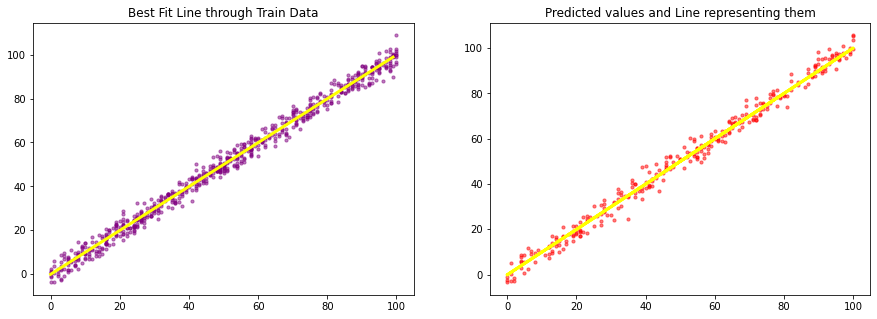

In [57]:
line = []       # The list of co-ordinates of y axis of the line

for i in range(100):       # The value of y as x increases according to the intercept and co-efficent
    line.append((1.00065638*i) + (-0.10726546430097272))
    
plt.figure
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

axs[0].scatter(train_data['x'], train_data['y'], c='Purple', marker=None, s=10, edgecolors='Purple'
               ,alpha=0.5)       # ScatterPlot of The Train Data
axs[0].plot(range(100),line,c='Yellow',linewidth=3)       # Best Fit line, passing through the data (ScatterPlot)
axs[0].set_title('Best Fit Line through Train Data')

axs[1].scatter(test_data['x'], test_data['y'], c='Red', marker=None, s=10, edgecolors='Red'
               ,alpha=0.5)       # ScatterPlot of the Test Data 
axs[1].plot(test_data['x'],test_y_pred,c='Yellow',linewidth=3)       # The line representing the Predicted values of Test Data
axs[1].set_title('Predicted values and Line representing them')

# <span style="color:#000; font-size:0.75em;">Predicting Random Variable</span>

In [196]:
prediction_1 = linear_Regression_Model.predict([x_train[100]])
pd.DataFrame({'X value': x_train[100],
              'Predicted Y Value' : prediction_1,
              'Observed Y Value' : y_train[100]})

,X value,Predicted Y Value,Observed Y Value
0,90.0,89.951809,89.910048


# <span style="color:#000; font-size:1.2em;">Stochastic Gradient Descent</span>

In [191]:
scaler = StandardScaler()
scaled_x_train = scaler.fit_transform(train_data['x'].values.reshape(-1,1))       # Scaled Feature column of Train DataSet
scaled_x_test = scaler.fit_transform(test_data['x'].values.reshape(-1,1))       # Scaled Feature column of Test DataSet
y_train = train_data['y']       # The output column of Train Dataset
y_test = test_data['y']       # The output column of Test Dataset

In [86]:
SGD_model = linear_model.SGDRegressor()

SGDRegressor()

# <span style="color:#000; font-size:0.75em;">Using Grid Search CV to find best parameters of SGD Model</span>

In [176]:
param_grid = {'loss': ['squared_error'],  
              'penalty': ['l2', 'l1', 'elasticnet', None], 
              'alpha': [0.00000001,0.0000001,0.000001,0.00001,0.0001,0.001,0.01,0.1],
              'l1_ratio': [0.05,0.10,0.15,0.20,0.25],
              'max_iter': [1,10,100,1000,10000,100000,1000000,10000000],
              'epsilon':[0.001,0.01,0.1,1]}     # Parameters to Test On
SGD_gridSearch = GridSearchCV(SGD_model, param_grid,cv=5,scoring='r2')
SGD_gridSearch.fit(scaled_x_train,y_train)       # Fit the GridSearchCV model on train Dataset

GridSearchCV(cv=5, estimator=SGDRegressor(),
             param_grid={'alpha': [1e-08, 1e-07, 1e-06, 1e-05, 0.0001, 0.001,
                                   0.01, 0.1],
                         'epsilon': [0.001, 0.01, 0.1, 1],
                         'l1_ratio': [0.05, 0.1, 0.15, 0.2, 0.25],
                         'loss': ['squared_error'],
                         'max_iter': [1, 10, 100, 1000, 10000, 100000, 1000000,
                                      10000000],
                         'penalty': ['l2', 'l1', 'elasticnet', None]},
             scoring='r2')

# <span style="color:#000; font-size:0.75em;">Training Evaluation Metrics and GridSearchCV best parameters</span>

In [177]:
SGD_fit_evaluation = {'Best R-squared Score' : SGD_gridSearch.best_score_,
                      'CV' : SGD_gridSearch.n_splits_,
                      }
best_parameters = pd.DataFrame(SGD_gridSearch.best_params_,index=['Best Parameters'])
training_evaluation_metrics = pd.DataFrame(SGD_fit_evaluation,index=['Evaluation Metric'])
print("---------------------------------------------------------------------------------")
print(best_parameters.to_string())
print("---------------------------------------------------------------------------------")
print(training_evaluation_metrics.to_string())
print("---------------------------------------------------------------------------------")

---------------------------------------------------------------------------------
                    alpha  epsilon  l1_ratio           loss  max_iter penalty
Best Parameters  0.000001        1       0.1  squared_error    100000      l1
---------------------------------------------------------------------------------
                   Best R-squared Score  CV
Evaluation Metric              0.990395   5
---------------------------------------------------------------------------------


# <span style="color:#000; font-size:0.75em;">Evaluation Metrics of Prediction using SGD Model</span>

In [178]:
SGD_train_y_pred = SGD_gridSearch.predict(scaled_x_train)       # Prediction on Train Set
SGD_test_y_pred = SGD_gridSearch.predict(scaled_x_test)       # Prediction on Test Set

In [179]:
SGD_prediction_evaulation = {'Train MSE': mean_squared_error(y_train,SGD_train_y_pred),
                             'Test MSE' : mean_squared_error(y_test,SGD_test_y_pred),
                             'Train RMSE': mean_squared_error(y_train,SGD_train_y_pred,squared=False),
                             'Test RMSE' : mean_squared_error(y_test,SGD_test_y_pred,squared=False)}
SGD_prediction_evaulation = pd.DataFrame(SGD_prediction_evaulation,index=['SGD Model Prediction Metrics'])
SGD_prediction_evaulation

,Train MSE,Test MSE,Train RMSE,Test RMSE
SGD Model Prediction Metrics,7.867768,10.763352,2.804954,3.280755


# <span style="color:#000; font-size:0.75em;">Predicting Random Variable</span>

In [197]:
prediction_2 = SGD_gridSearch.predict([scaled_x_train[21]])
pd.DataFrame({'X value': scaled_x_train[21],
              'Predicted Y Value' : prediction_2,
              'Observed Y Value' : y_train[21]})

,X value,Predicted Y Value,Observed Y Value
0,1.278285,86.954951,84.994847


# <span style="color:#000; font-size:1.2em;">Comparing Evaulations</span>

In [145]:
print("--------------------------------------------------------------------------------------------")
print(Linear_Regression_prediction_evaulation.to_string())
print("--------------------------------------------------------------------------------------------")
print(SGD_prediction_evaulation.to_string())
print("--------------------------------------------------------------------------------------------")

--------------------------------------------------------------------------------------------
                                            Train MSE  Test MSE  Train RMSE  Test RMSE
Linear Regression Model Prediction Metrics   7.867753  9.432922    2.804951   3.071306
--------------------------------------------------------------------------------------------
                              Train MSE   Test MSE  Train RMSE  Test RMSE
SGD Model Prediction Metrics   7.867975  10.789215    2.804991   3.284694
--------------------------------------------------------------------------------------------


# <span style="color:#339999; font-size:1.25em;">Findings:</span>
<p style="color:#339999; font-size:1.1em;">
    Both Models Perform well on both the sets and performs Regression with great accuracy. However, looking at the MSE and RMSE scores of both the Train and Test datasets on both Linear Regression and Stochastic Descent Gradient models, the scores or Linear Regression Model are slightly more accurate
</p>